Documentación del Análisis Exploratorio de Datos (EDA)
Introducción

Desde su creación, el internet ha transformado la manera en que las personas interactúan, trabajan y acceden a la información. A nivel mundial, su crecimiento ha sido exponencial, integrándose en diversos aspectos de la vida cotidiana y en tecnologías emergentes. Factores como el auge de la tecnología móvil y la pandemia de COVID-19 han acelerado aún más su adopción, marcando hitos históricos en su expansión global.

En Argentina, este fenómeno no es la excepción. Durante los últimos años, sectores como la telefonía móvil e internet han mostrado un crecimiento económico notable, convirtiéndose en pilares fundamentales para el desarrollo tecnológico y social del país. Este análisis busca comprender cómo ha evolucionado el internet en Argentina en comparación con otros medios de comunicación tradicionales, como la televisión y la telefonía fija, considerando variaciones por provincia y año.

In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Análisis de ingresos por tecnología (2014-2024)

El gráfico muestra los ingresos generados por internet, telefonía fija, telefonía móvil y televisión por suscripción en Argentina entre 2014 y 2024. Los hallazgos principales son:

    Telefonía móvil:
        Es la tecnología con mayor crecimiento, pasando de 13,970.8 millones de pesos en 2014 a 1,108,472.5 millones de pesos en 2024.
        Su estabilidad frente a factores externos, como la pandemia, la consolida como líder en el mercado.

    Internet:
        Creció de 3,270.8 millones de pesos en 2014 a 442,032.2 millones de pesos en 2024.
        Mostró caídas en períodos de incertidumbre, pero a partir de 2022 comenzó a recuperarse.

    Telefonía fija y TV por suscripción:
        Estas tecnologías tuvieron un crecimiento marginal, debido al avance de la telefonía móvil y la popularidad de plataformas de streaming.

Conclusión

La telefonía móvil e internet lideran el mercado, mientras que la telefonía fija y la TV por suscripción están siendo desplazadas por tecnologías más modernas.

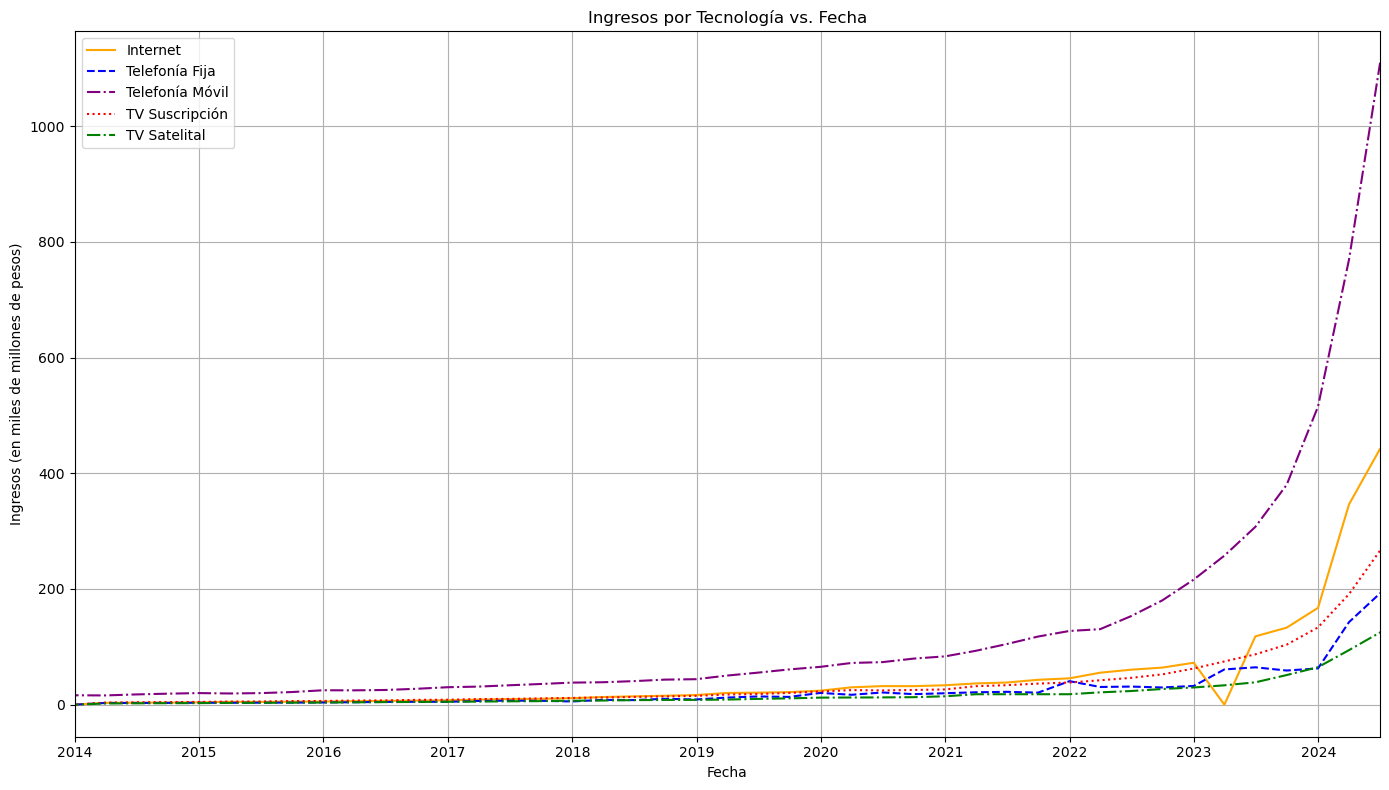

In [ ]:
# Cargamos los archivos que ocuparemos en la comparación
df_internet = pd.read_csv("H:/PROYECTO INDIVIDUAL DOS/datos/dataset .csv/Internet/Ingresos .csv")
df_telefonia_fija = pd.read_csv("H:/PROYECTO INDIVIDUAL DOS/datos/dataset .csv/telefonia_fija/Fija_ingresos.csv")
df_telefonia_movil = pd.read_csv("H:/PROYECTO INDIVIDUAL DOS/datos/dataset .csv/Telefonia_movil/Ingresos.csv")
df_tv = pd.read_csv("H:/PROYECTO INDIVIDUAL DOS/datos/dataset .csv/Television/Ingresos_TV.csv")

# Nos aseguramos que las fechas esten en el mismo formato y selecionamos las colunmas a usar 
df_internet['Fecha'] = pd.to_datetime(df_internet['Fecha'])
df_telefonia_fija['Fecha'] = pd.to_datetime(df_telefonia_fija['Fecha'])
df_telefonia_movil['Fecha'] = pd.to_datetime(df_telefonia_movil['Fecha'])
df_tv['Fecha'] = pd.to_datetime(df_tv['Fecha'])

df_internet = df_internet.rename(columns={'Ingresos (miles de pesos)': 'Internet'})
df_telefonia_fija = df_telefonia_fija.rename(columns={'Ingresos (miles de $)': 'Telefonia Fija'})
df_telefonia_movil = df_telefonia_movil.rename(columns={'Ingresos (miles de $)': 'Telefonia Movil'})
df_tv = df_tv.rename(columns={'Ingresos TV por suscripción  (miles de $)': 'TV Suscripción', 'Ingresos TV satelital (miles de $)': 'TV Satelital'})

# Unimos  mediante merge usando de bace la columna Fecha
df_merged = df_internet.merge(df_telefonia_fija, on='Fecha', how='outer')
df_merged = df_merged.merge(df_telefonia_movil, on='Fecha', how='outer')
df_merged = df_merged.merge(df_tv, on='Fecha', how='outer')

# Llenamos de aber  valores NaN con 0 y  los ordenamos  por fecha
df_merged = df_merged.fillna(0).sort_values(by='Fecha')

# Convertimos  ingresos a "miles de millones de pesos" para una escala más clara
df_merged[['Internet', 'Telefonia Fija', 'Telefonia Movil', 'TV Suscripción', 'TV Satelital']] /= 1e6

# Creamos el gráfico de líneas
plt.figure(figsize=(14, 8))

# Definimos  colores para cada tecnología
colores = {
    "Internet": "orange",
    "Telefonia Fija": "blue",
    "Telefonia Movil": "purple",
    "TV Suscripción": "red",
    "TV Satelital": "green"
}

# Graficamos cada serie de ingresos con su respectivo color
plt.plot(df_merged['Fecha'], df_merged['Internet'], label="Internet", color=colores["Internet"])
plt.plot(df_merged['Fecha'], df_merged['Telefonia Fija'], label="Telefonía Fija", color=colores["Telefonia Fija"], linestyle="--")
plt.plot(df_merged['Fecha'], df_merged['Telefonia Movil'], label="Telefonía Móvil", color=colores["Telefonia Movil"], linestyle="-.")
plt.plot(df_merged['Fecha'], df_merged['TV Suscripción'], label="TV Suscripción", color=colores["TV Suscripción"], linestyle=":")
plt.plot(df_merged['Fecha'], df_merged['TV Satelital'], label="TV Satelital", color=colores["TV Satelital"], linestyle="-.")

# Configuramos el gráfico
plt.title("Ingresos por Tecnología vs. Fecha")
plt.xlabel("Fecha")
plt.ylabel("Ingresos (en miles de millones de pesos)")

# Limitamos el eje x al rango 2014 - 2024 (hasta el 30 de junio)
plt.xlim(pd.Timestamp("2014-01-01"), pd.Timestamp("2024-06-30"))

# Ajustamos la escala de ingresos en el eje y para ver los valores en miles de millones
plt.ticklabel_format(style='plain', axis='y')  

plt.legend(loc="upper left")  
plt.grid(True) 
plt.tight_layout()  

# Mostrar el gráfico
plt.show()


Análisis de distribución de accesos por tecnología (2014 vs 2024)

El gráfico de donas compara la distribución de accesos a internet entre 2014 y 2024 según las principales tecnologías. Los hallazgos clave son:

    Fibra óptica:
        Creció significativamente, alcanzando el 36.1% en 2024 debido a la creciente demanda de mayor ancho de banda.

    Cablemódem:
        Mantuvo su posición como la tecnología más utilizada, representando el 50.8% en 2024, con un crecimiento sostenido desde el 38.1% en 2014.

    ADSL:
        Mostró una caída marcada, pasando del 57.4% en 2014 a valores marginales en 2024, debido a su obsolescencia.

    Wireless:
        A pesar de un leve crecimiento, sus limitaciones en ancho de banda y conectividad restringen su adopción masiva.

Conclusión

La transición hacia tecnologías más modernas, como la fibra óptica y el cablemódem, refleja la necesidad de soportar mayores velocidades y un mejor rendimiento, dejando atrás soluciones como ADSL.

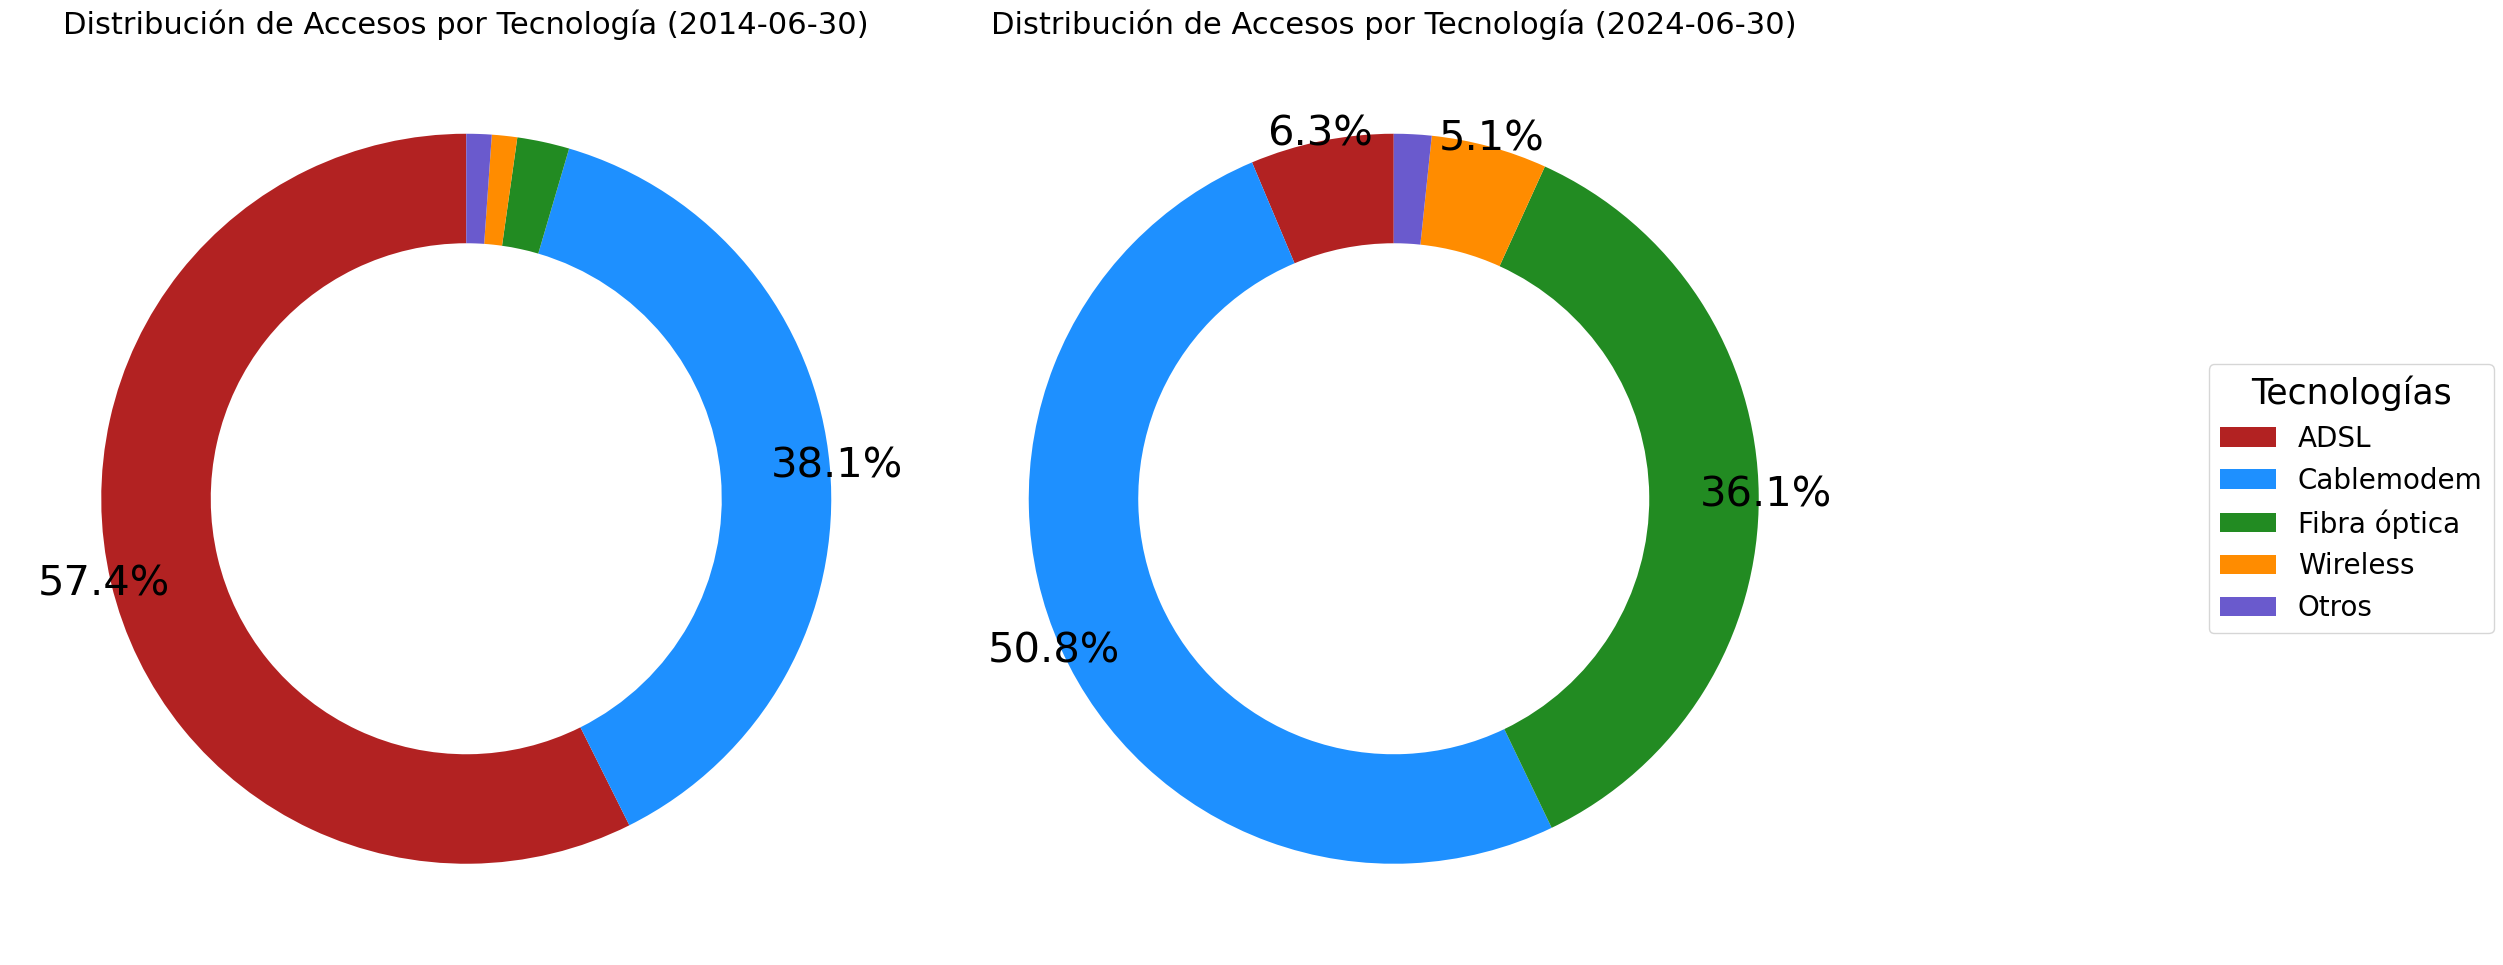

In [49]:
#Cargamos el archibo con los datos a comparar
ruta_archivo = r"H:/PROYECTO INDIVIDUAL DOS/datos/dataset .csv/Internet/Accesos Por Tecnología.csv"

try:
    # Carga del archivo
    df = pd.read_csv(ruta_archivo)

    # Filtramos los datos para las fechas seleccionadas
    fechas_interes = ['2014-06-30', '2024-06-30']
    df_filtrado = df[df['Fecha'].isin(fechas_interes)]  # Asegúrate de que la columna se llame 'Fecha'

    # Separamos los datos por fecha
    datos_2014 = df_filtrado[df_filtrado['Fecha'] == '2014-06-30']
    datos_2024 = df_filtrado[df_filtrado['Fecha'] == '2024-06-30']

    # Seleccionamos las categorías y valores
    categorias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
    valores_2014 = datos_2014[categorias].sum().values
    valores_2024 = datos_2024[categorias].sum().values

    # Creamos subplots: 1 fila, 2 columnas con mayor tamaño de figura
    fig, axes = plt.subplots(1, 2, figsize=(22, 14))

    # Seleccionamos los colores a usar
    colores_oscuros = ['#b22222', '#1e90ff', '#228b22', '#ff8c00', '#6a5acd']

    # Creamos una función para personalizar la posición de los porcentajes fuera del gráfico con líneas guía
    def autopct_format(pct):
        return f'{pct:.1f}%' if pct > 5 else ''  

    # Gráfico de dona para 2014
    wedges, texts, autotexts = axes[0].pie(
        valores_2014,
        autopct=autopct_format, startangle=90, colors=colores_oscuros,
        wedgeprops={'width': 0.3}, pctdistance=0.85, textprops={'fontsize': 18},
        labeldistance=1.1
    )
    axes[0].set_title("Distribución de Accesos por Tecnología (2014-06-30)", fontsize=22)

    # Agregamos líneas guía para los porcentajes
    for i, autotext in enumerate(autotexts):
        autotext.set_color("black")  
        autotext.set_fontsize(30)  
        autotext.set_position((autotext.get_position()[0] * 1.2, autotext.get_position()[1] * 1.2))  

    # Gráfico de dona para 2024
    wedges, texts, autotexts = axes[1].pie(
        valores_2024,
        autopct=autopct_format, startangle=90, colors=colores_oscuros,
        wedgeprops={'width': 0.3}, pctdistance=0.85, textprops={'fontsize': 18},
        labeldistance=1.1
    )
    axes[1].set_title("Distribución de Accesos por Tecnología (2024-06-30)", fontsize=22)

    # Agregamos líneas guía para los porcentajes
    for i, autotext in enumerate(autotexts):
        autotext.set_color("black") 
        autotext.set_fontsize(30)  
        autotext.set_position((autotext.get_position()[0] * 1.2, autotext.get_position()[1] * 1.2)) 

    # Agregamos leyenda
    fig.legend(wedges, categorias, title="Tecnologías", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=20, title_fontsize=25)

    # Ajustamos el diseño y mostramos los gráficos
    plt.tight_layout(rect=[0, 0, 0.85, 1])  
    plt.show()

except Exception as e:
    print(f"Error al procesar el archivo: {e}")


Evolución de accesos por cada 100 hogares en provincias (2014-2024)

Los gráficos de barras a continuación comparan el acceso a internet por cada 100 hogares en las provincias argentinas en 2014 y 2024. Los puntos clave son:

    Capital Federal lidera el acceso:
        En ambos períodos, Capital Federal muestra el mayor acceso a internet, creciendo de 43 accesos por cada 100 hogares en 2014 a 47.4 en 2024.

    Provincias con mayor crecimiento:
        San Luis destaca con un crecimiento significativo, subiendo de 2.8 accesos en 2014 a 29.6 en 2024.
        La Pampa y Tierra del Fuego también muestran un notable aumento, alcanzando 33.3 y 32.3 accesos, respectivamente, en 2024.

    Provincias con menor acceso:
        En 2024, Formosa sigue siendo la provincia con menor acceso, con solo 10.1 accesos por cada 100 hogares, seguida por Chaco con 11.8 accesos.

    Tendencia general:
        En promedio, las provincias argentinas experimentaron un aumento significativo en los accesos, reflejando el avance en la conectividad a nivel nacional.

Conclusión

El aumento en el acceso a internet en todas las provincias evidencia un esfuerzo por reducir la brecha digital, aunque persisten desigualdades significativas entre regiones. Las provincias con menos recursos aún enfrentan retos para igualar los niveles de conectividad de las áreas más urbanizadas.

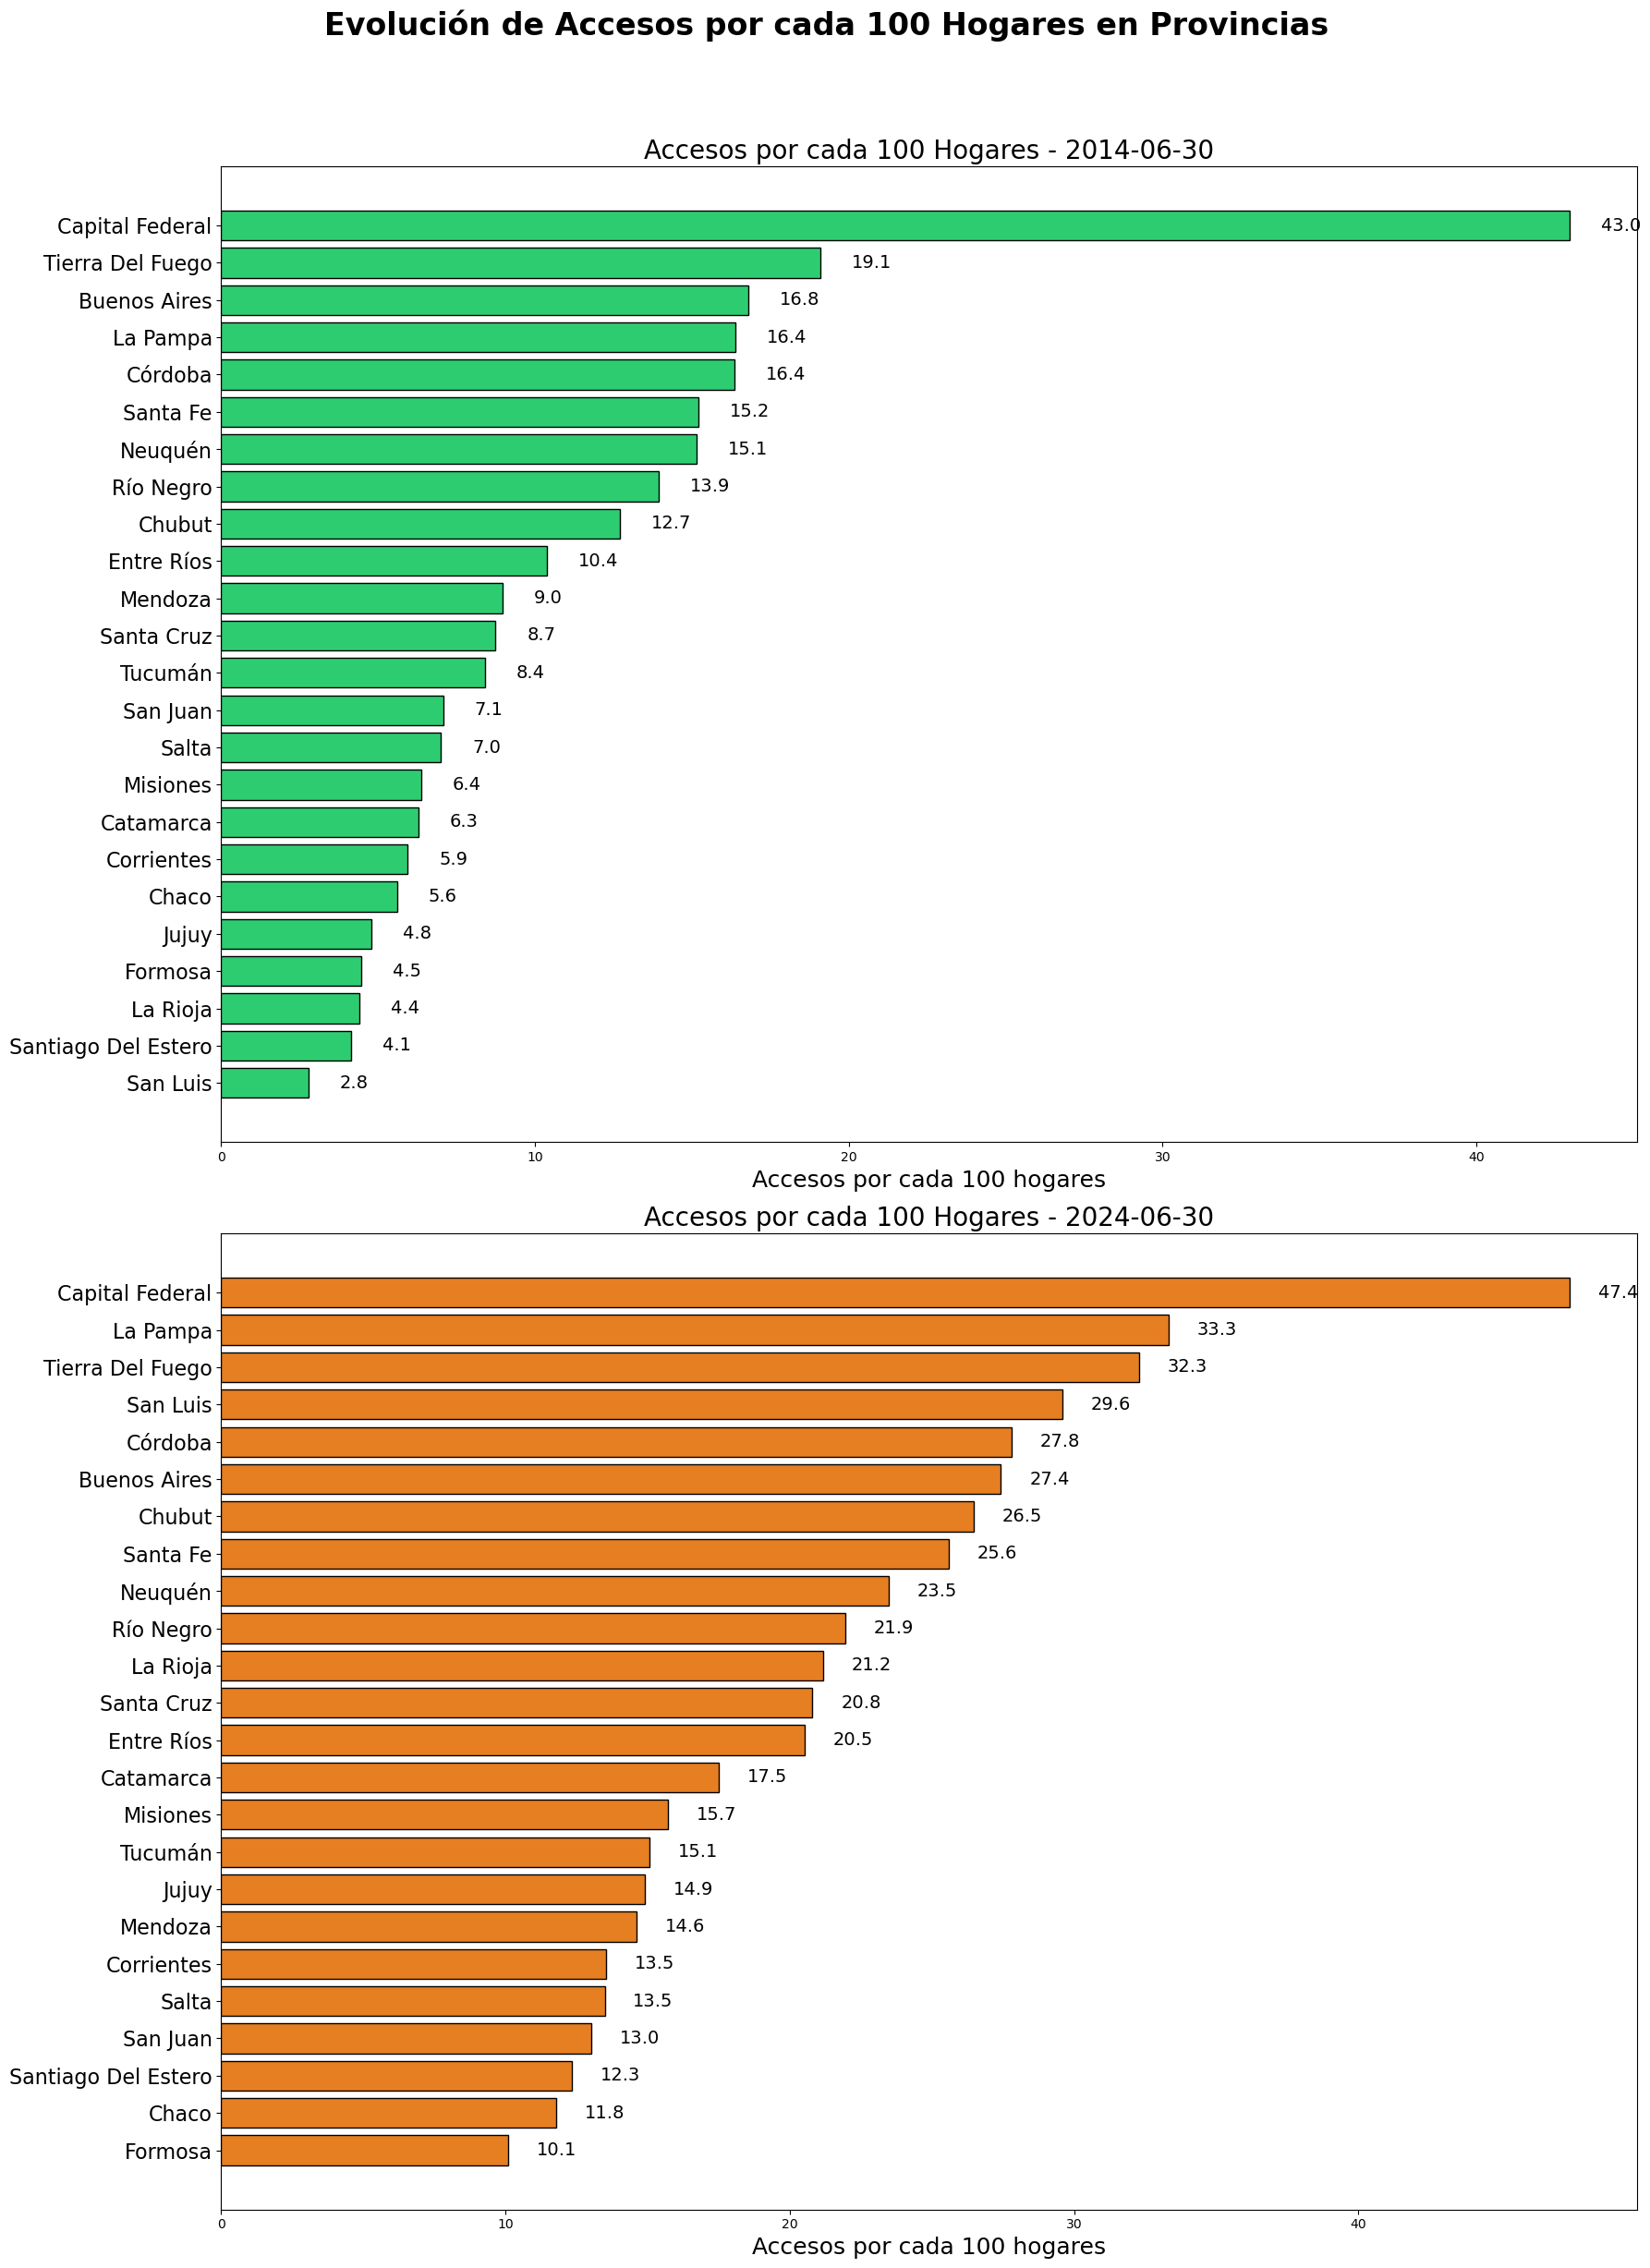

In [ ]:
# Cargamos los datos a usar para la comparación
ruta_csv = "H:/PROYECTO INDIVIDUAL DOS/datos/dataset .csv/Internet/Penetración-poblacion.csv"
datos_penetracion = pd.read_csv(ruta_csv)

# Selecionamos las fechas a usar
fechas_interes = ['2014-06-30', '2024-06-30']
datos_filtrados = datos_penetracion[datos_penetracion['Fecha'].isin(fechas_interes)]

# Creaamos un gráfico horizontal para cada año
fig, axs = plt.subplots(2, 1, figsize=(18, 25), sharex=False)  # Tamaño más grande para mayor visibilidad

# Selecionamos los colores a usar
colores = ['#2ECC71', '#E67E22']  # Verde y naranja

for i, fecha in enumerate(fechas_interes):
    datos_anio = datos_filtrados[datos_filtrados['Fecha'] == fecha]
    datos_anio = datos_anio.sort_values(by='Accesos por cada 100 hab', ascending=True)  # Ordenar de menor a mayor
    
    # Creamos gráfico de barras horizontales
    barras = axs[i].barh(datos_anio['Provincia'], datos_anio['Accesos por cada 100 hab'], color=colores[i], edgecolor='black')

    # Añadimos las  cantidades al final de cada barra
    for barra in barras:
        ancho = barra.get_width()
        axs[i].text(ancho + 1, barra.get_y() + barra.get_height() / 2, f'{ancho:.1f}', va='center', fontsize=14)
    
    # Configuramos el  título y etiquetas
    axs[i].set_title(f'Accesos por cada 100 Hogares - {fecha}', fontsize=20)
    axs[i].set_xlabel('Accesos por cada 100 hogares', fontsize=18)
    axs[i].tick_params(axis='y', labelsize=16)

# Configuramos las etiquetas comunes y título general
fig.suptitle('Evolución de Accesos por cada 100 Hogares en Provincias', fontsize=24, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Imprimimos  los gráficos
plt.show()


Distribución de Tecnologías por Provincia

El gráfico de arbol  Treemap muestra cómo se distribuyen las tecnologías de acceso a internet en cada provincia argentina. Los principales hallazgos son:

    Variación entre provincias:
        Provincias como Buenos Aires, Córdoba y Santa Fe tienen una distribución equilibrada entre tecnologías como fibra óptica, cablemódem y wireless.
        En contraste, provincias como Formosa, Santiago del Estero y San Luis dependen más de tecnologías como wireless y satelital debido a limitaciones de infraestructura.

    Predominio de fibra óptica:
        En provincias más urbanizadas, como CABA y Buenos Aires, la fibra óptica y el cablemódem son predominantes, lo que refleja un avance en infraestructura tecnológica.

    ADSL y tecnologías satelitales:
        Tecnologías más antiguas, como el ADSL, aún tienen una presencia considerable en provincias menos desarrolladas, aunque están siendo desplazadas lentamente por opciones más modernas.

    Wireless:
        Esta tecnología sigue siendo relevante en provincias con menor densidad poblacional, como La Rioja, Chaco y Tucumán, aunque con limitaciones en velocidad y conectividad.

Conclusión

El gráfico evidencia la desigualdad en el acceso a tecnologías avanzadas entre provincias urbanas y rurales. El avance en infraestructura, como la fibra óptica, está concentrado en áreas urbanizadas, mientras que provincias más remotas dependen de soluciones inalámbricas y satelitales.

In [ ]:

# Cargamos el grafico para el grafico de arbol Treemap
df = pd.read_csv(r'H:/PROYECTO INDIVIDUAL DOS/datos/dataset .csv/mapa_conectividad/mapa_conectividad.csv')

# Definimos las columnas de tecnologías
columnas_tecnologias = ['ADSL', 'Cablemódem', 'Fibra óptica', 'Satelital', 'Wireless']

# Convertimos valores 'SI' y 'None' en valores numéricos (1 para 'SI', 0 para 'None')
for col in columnas_tecnologias:
    df[col] = df[col].apply(lambda x: 1 if x == 'SI' else 0)

# Agrupamos  por provincia y sumar las tecnologías
df_agrupado = df.groupby('Provincia')[columnas_tecnologias].sum().reset_index()

# Transformamos  los datos para el Treemap usando melt
df_treemap = df_agrupado.melt(
    id_vars='Provincia',
    var_name='Tecnología',
    value_name='Localidades'
)

# Creamos grafico de  Treemap
fig = px.treemap(
    df_treemap,
    path=['Provincia', 'Tecnología'],  # Jerarquía: Provincia -> Tecnología
    values='Localidades',             # Tamaño basado en el número de localidades
    color='Provincia',                # Colorear por provincia
    title='Distribución de Tecnologías por Provincia',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Ajustamos el tamaño del gráfico
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    width=1200,  # Ancho del gráfico
    height=800   # Altura del gráfico
)

# Mostramos el gráfico
fig.show()



Variación de Accesos de Telefonía Fija por cada 100 Habitantes y Hogares (2014-2024)
1. Accesos por cada 100 habitantes

El primer gráfico muestra la tendencia de accesos a telefonía fija por cada 100 habitantes entre 2014 y 2024. Se observa una caída significativa a partir de 2018:

    De 25 accesos por cada 100 habitantes en 2014, los valores han disminuido a cerca de 17 accesos en 2024.
    Este descenso refleja la preferencia por tecnologías móviles y el abandono de líneas fijas.

2. Accesos por cada 100 hogares

El segundo gráfico muestra la misma tendencia a nivel de hogares. En 2014, había cerca de 80 accesos por cada 100 hogares, pero esta cifra se redujo drásticamente a aproximadamente 60 accesos en 2024:

    El declive se acentuó a partir de 2018, probablemente debido a la adopción de servicios de internet y la reducción de la dependencia de líneas fijas para la comunicación.

Conclusión

Ambos gráficos evidencian una clara pérdida de relevancia de la telefonía fija frente al avance de la telefonía móvil e internet. Esta tendencia subraya un cambio en los hábitos de consumo tecnológico en Argentina.

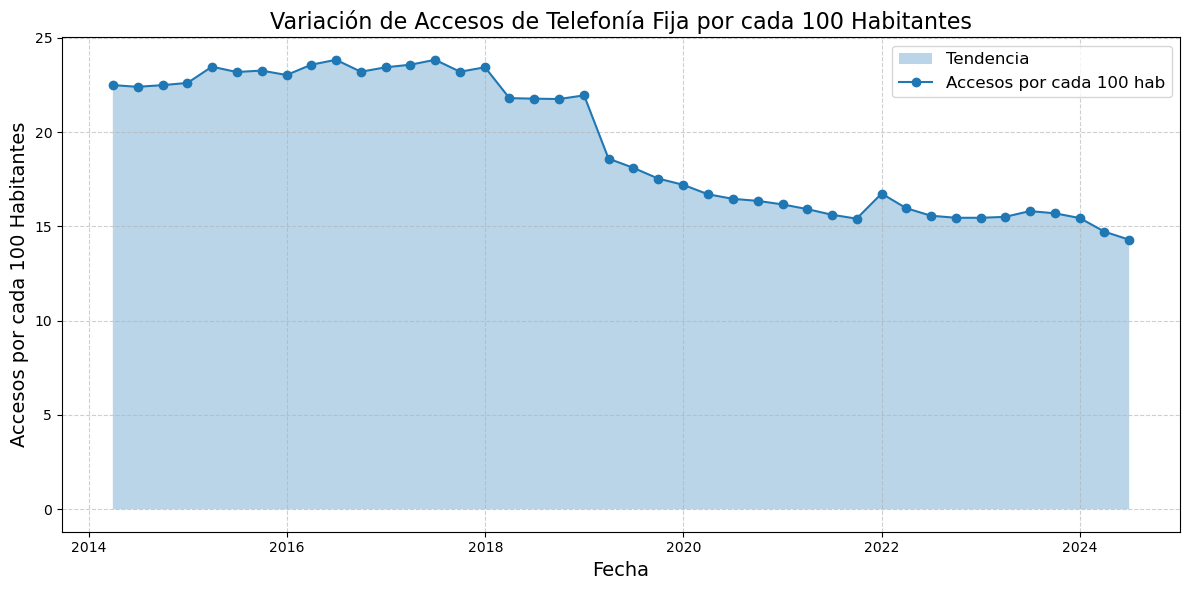

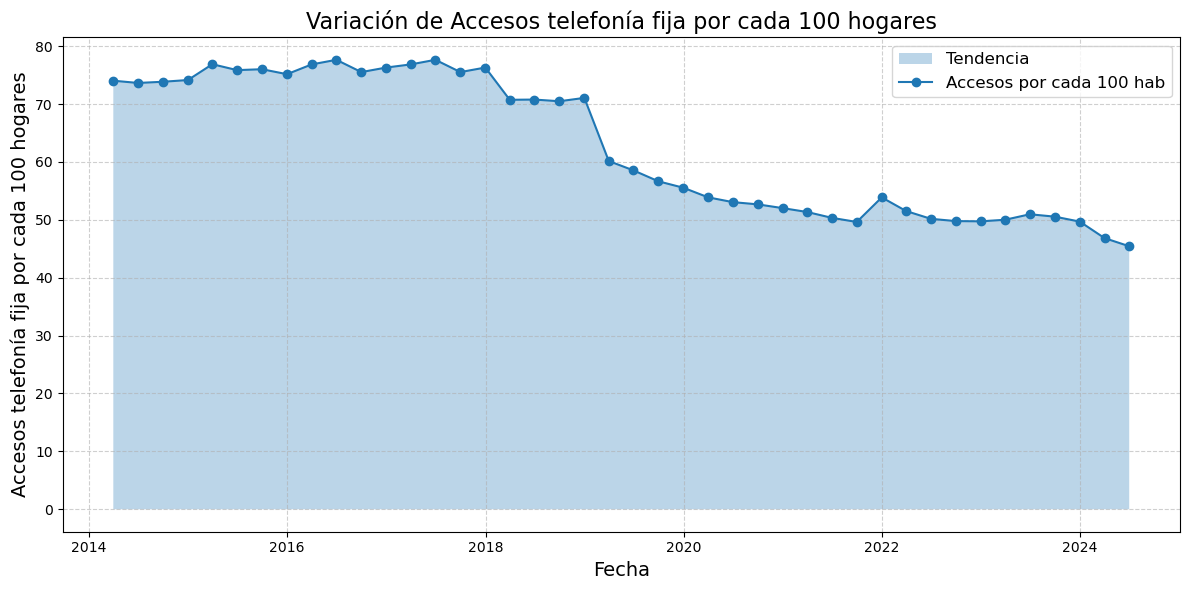

In [ ]:
# Cargamos el archivo a usar en las comparaciones
df = pd.read_csv(r'H:/PROYECTO INDIVIDUAL DOS/datos/dataset .csv/telefonia_fija/Fija_penetracion_tot.csv')

# De haber espacios en los nombres de las columnas los eliminamos
df.columns = df.columns.str.strip()


# Nos aseguramos que la columna Fecha este en un  tipo datetime
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'])
else:
    print("La columna 'Fecha' no existe. Verifica el nombre exacto.")

# Creamos el gráfico Variación de Accesos de Telefonía Fija por cada 100 Habitantes
if 'Fecha' in df.columns and 'Accesos telefonía fija por cada 100 hab' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.fill_between(df['Fecha'], df['Accesos telefonía fija por cada 100 hab'], alpha=0.3, label='Tendencia')
    plt.plot(df['Fecha'], df['Accesos telefonía fija por cada 100 hab'], marker='o', label='Accesos por cada 100 hab')
    plt.title('Variación de Accesos de Telefonía Fija por cada 100 Habitantes', fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Accesos por cada 100 Habitantes', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron las columnas necesarias para el gráfico.")


# Crear el gráfico Variación de Accesos telefonía fija por cada 100 hogares
if 'Fecha' in df.columns and 'Accesos telefonía fija por cada 100 hogares' in df.columns:
    plt.figure(figsize=(12, 6))
    plt.fill_between(df['Fecha'], df['Accesos telefonía fija por cada 100 hogares'], alpha=0.3, label='Tendencia')
    plt.plot(df['Fecha'], df['Accesos telefonía fija por cada 100 hogares'], marker='o', label='Accesos por cada 100 hab')
    plt.title('Variación de Accesos telefonía fija por cada 100 hogares', fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Accesos telefonía fija por cada 100 hogares', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron las columnas necesarias para el gráfico.")



Evolución de Accesos a Telefonía Móvil por cada 100 Habitantes (2014-2024)

El gráfico muestra la evolución de accesos a telefonía móvil por cada 100 habitantes en Argentina durante el período 2014-2024. Los hallazgos principales son:

    Tendencia general:
        Aunque los accesos comenzaron con un valor elevado de cerca de 160 por cada 100 habitantes en 2014, hubo una leve disminución entre 2015 y 2018, alcanzando un punto bajo alrededor de los 140 accesos.
        Posteriormente, los valores se estabilizan y muestran un crecimiento moderado, cerrando en 140-150 accesos por cada 100 habitantes en 2024.

    Impacto de factores externos:
        La estabilización y recuperación desde 2018 pueden atribuirse a una creciente dependencia de los dispositivos móviles y la expansión de los servicios de datos móviles.

    Conclusión:
        La telefonía móvil se mantiene como un servicio esencial, con accesos superiores al 100%, lo que indica que muchas personas poseen más de un dispositivo móvil o línea activa.

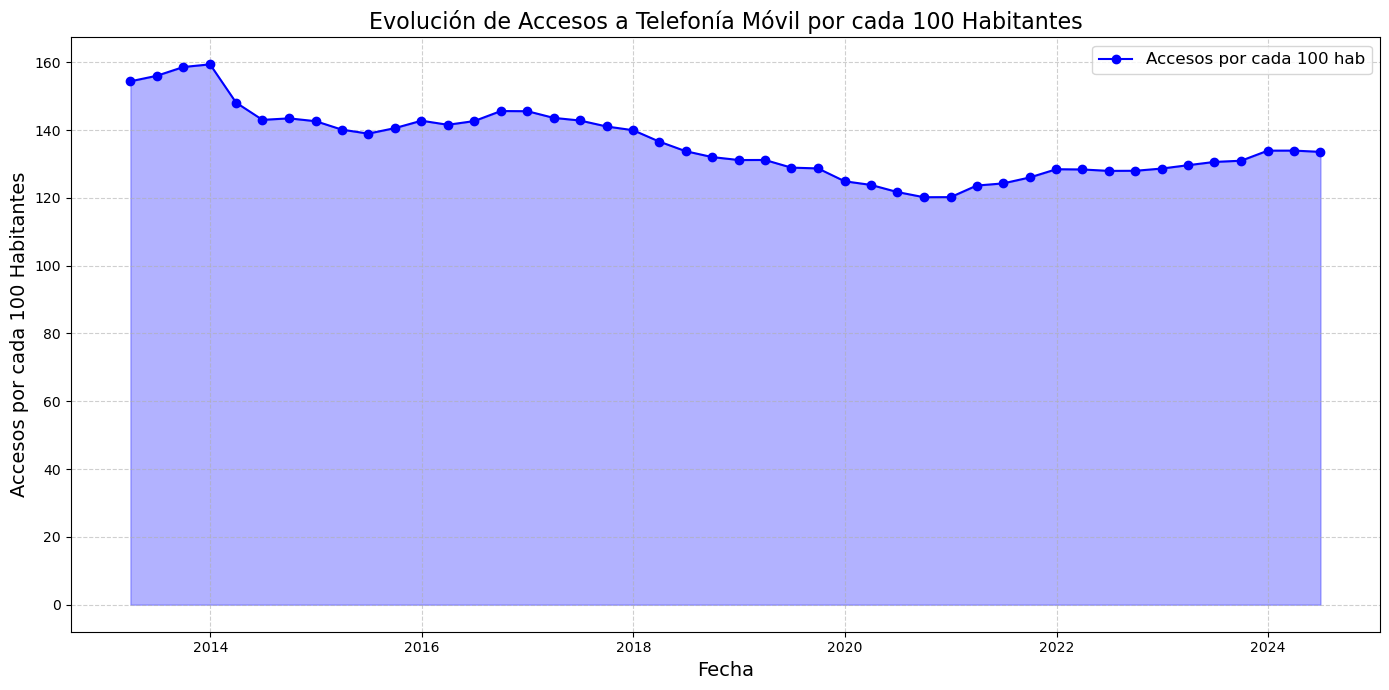

In [ ]:
# Cargamos el archivo a usar
df = pd.read_csv(r'H:/PROYECTO INDIVIDUAL DOS/datos/dataset .csv/Telefonia_movil/Penetracion.csv')

# Convertimos la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Creamos el gráfico de líneas
plt.figure(figsize=(14, 7))
plt.plot(df['Fecha'], df['Accesos por cada 100 hab'], marker='o', color='blue', label='Accesos por cada 100 hab')
plt.fill_between(df['Fecha'], df['Accesos por cada 100 hab'], alpha=0.3, color='blue')

# Añadimos etiquetas y título
plt.title('Evolución de Accesos a Telefonía Móvil por cada 100 Habitantes', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Accesos por cada 100 Habitantes', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Mostramos el gráfico
plt.show()
    

Accesos a TV por Suscripción y Satelital (2014-2024)

El gráfico muestra la evolución de los accesos a TV por suscripción y TV satelital, tanto por cada 100 habitantes como por cada 100 hogares, durante el período 2014-2024. Los puntos clave son:

    Tendencia general:
        TV por suscripción muestra una disminución gradual en el número de accesos por cada 100 habitantes y hogares.
        TV satelital se mantiene relativamente estable en comparación con la TV por suscripción.

    Diferencias entre TV por suscripción y TV satelital:
        Los accesos por TV satelital por hogar son consistentemente mayores que los de TV por suscripción, lo que indica una preferencia hacia esta tecnología en zonas menos urbanizadas o con menor infraestructura para servicios por cable.

    Impacto en el tiempo:
        A partir de 2018, se observa una aceleración en la disminución de los accesos a TV por suscripción, posiblemente debido al aumento en el uso de plataformas de streaming como una alternativa moderna y flexible.

    Conclusión:
        Mientras la TV por suscripción pierde relevancia, la TV satelital se mantiene estable en áreas específicas, aunque ambas tecnologías enfrentan una tendencia a la baja debido a cambios en los hábitos de consumo.

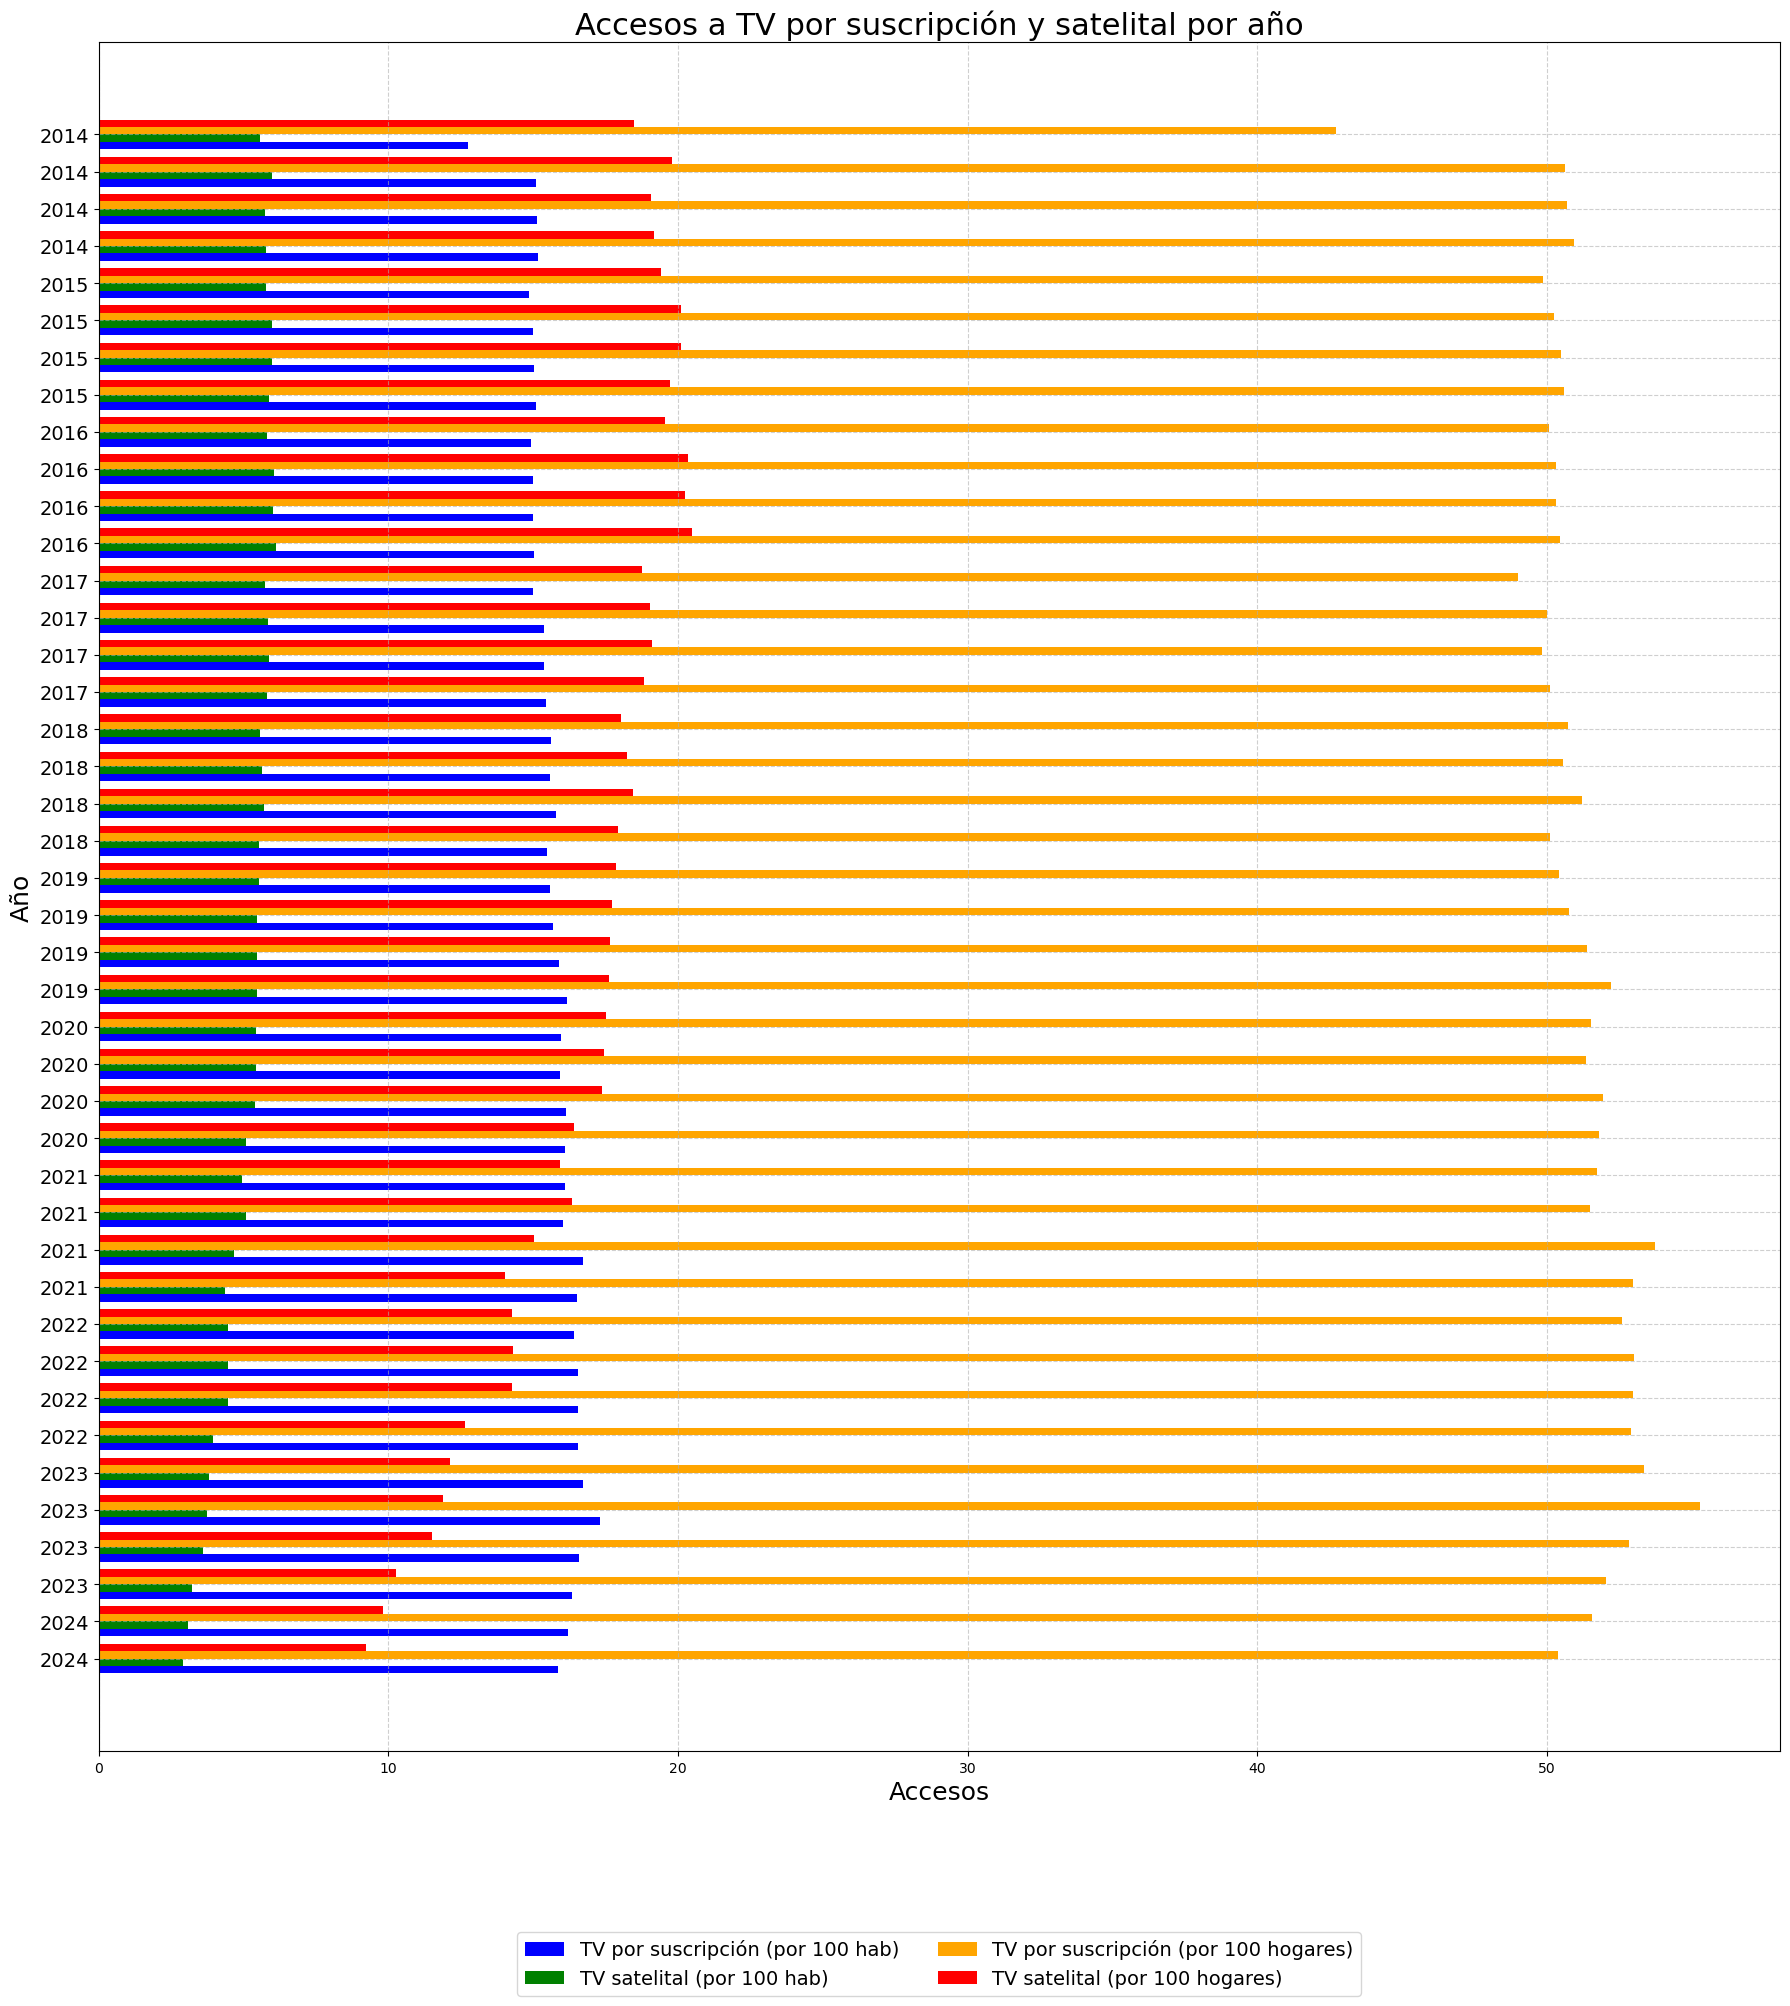

In [ ]:
# Cargamos el archivo a usar
df = pd.read_csv(r'H:/PROYECTO INDIVIDUAL DOS/datos/dataset .csv/Television/Penetracion_totales_TV.csv')

# Convertimos la columna Fecha a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Seleccionamos solo el año para agrupar los datos
df['Año'] = df['Fecha'].dt.year

# Creamos las posiciones para las barras
x = np.arange(len(df['Año']))  # Posiciones para las barras
width = 0.2  # Ancho de cada barra

fig, ax = plt.subplots(figsize=(18, 20))  # Aumentar la altura del gráfico

# Graficamos cada categoría como barras horizontales
ax.barh(x - width*1.5, df['Accesos TV por suscripción por cada 100 hab'], height=width, label='TV por suscripción (por 100 hab)', color='blue')
ax.barh(x - width/2, df['Accesos TV satelital por cada 100 hab'], height=width, label='TV satelital (por 100 hab)', color='green')
ax.barh(x + width/2, df['Accesos TV por suscripción por cada 100 hogares'], height=width, label='TV por suscripción (por 100 hogares)', color='orange')
ax.barh(x + width*1.5, df['Accesos TV satelital por cada 100 hogares'], height=width, label='TV satelital (por 100 hogares)', color='red')

# Configuramos etiquetas y título
ax.set_title('Accesos a TV por suscripción y satelital por año', fontsize=22)
ax.set_ylabel('Año', fontsize=18)
ax.set_xlabel('Accesos', fontsize=18)
ax.set_yticks(x)
ax.set_yticklabels(df['Año'], fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)

# Movemos la leyenda fuera del área de datos
ax.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Ajustamos el diseño
fig.tight_layout()

# Mostramos el gráfico
plt.show()



Conclusión General

El análisis muestra una clara transformación en el consumo de tecnologías de comunicación en Argentina durante la última década. Las principales observaciones son:

    Crecimiento sostenido del internet y la telefonía móvil: Estas tecnologías lideran el mercado, impulsadas por la digitalización, el acceso a dispositivos móviles y la creciente demanda de conectividad de alta velocidad.

    Declive de tecnologías tradicionales: Tanto la telefonía fija como la TV por suscripción han experimentado una disminución significativa en accesos debido a su reemplazo por alternativas más modernas, como servicios de streaming y telefonía móvil.

    Desigualdad en el acceso: Persisten brechas tecnológicas entre provincias urbanizadas y rurales, con un avance más lento en regiones menos desarrolladas.

En resumen, los datos reflejan un cambio en los hábitos de consumo, marcado por la adopción de tecnologías avanzadas y el abandono progresivo de soluciones tradicionales. Estos hallazgos son clave para planificar estrategias de inversión y desarrollo tecnológico en el país.